# **Capstone project: Salifort Motors Employees Retention Project**

> **Program:** Google Advanced Data Analytic Capstone Project <br>
> **Project Title:** Employees Retention Analysis and Prediction <br>
> **Name:** Louis Amalye <br>
> **LinkedIN:** https://www.linkedin.com/in/louis-amakye-34358816b/<br>
> **Email:** louisamakye20@gmail.com

## Table of Contents

* [Pace Stages](#ps)
* [Pace: Plan](#pace)
    * [Problem Statement](#ps)
    * [Hypothesis](#hs)
    * [Project Goal](#pg)
    * [Information Needed](#in)
    * [Step 1](#st1)
      * [Importing Packages](#ip)
      * [Load Dataset](#ld)
    * [Step 2](#st2)
* [pAce: Analyze Stage](#pace1)
    * [EDA 2](#st3)
    * [Data Visualization](#dv)
    * [A/B Testing](#abt)
    * [Insights](#is)
* [paCe: Construct Stage](#con)
    * [Step 3 ](#st4)
      * [Feature Engineering](#fe)
      * [Decision Tree ](#dt)
      * [Random Forest](#rf)
      * [Model Visualization](#mv)
* [pacE: Execute Stage](#es)      
   * [Conclusion and Recommendation](#cr) 
* [Reference](#r) 

# **PACE stages** <a id='ps'></a>


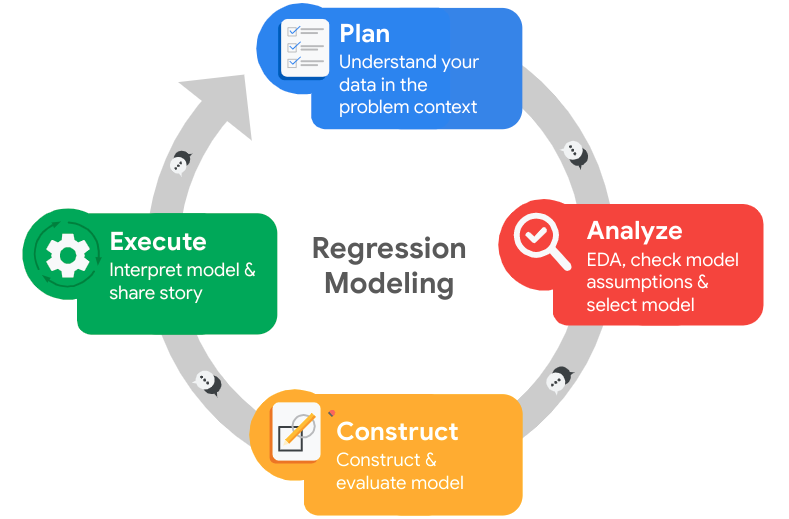

## 1.0  **Pace: Plan** <a id='pace'></a>


## 1.1 Business Problem Understanding<a id='bp'></a>

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### 1.2 Hypothesis <a id='hs'></a>

<p style="text-align:justify;">It is possible to predict that whether or not an employee will leave the company using machine learning model?</p>

### 1.3 Project Goal <a id='pg'></a>

<p style="text-align:justify;">In this project, I seek to provide data-driven suggestions for HR by achieving the following goals;</p>

* Draw unique insights from what’s likely to make the employee leave the company
* Build a predictive model to predict whether or not an employee will leave the company using machine learning model. 

### 1.4 Information Provided <a id='in'></a>

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports<a id='st1'></a>

*   Import packages
*   Load dataset



### Import packages<a id='ip'></a>

In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd
import scipy.stats as stats

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
%matplotlib inline


pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", 150)
sns.set_style("darkgrid")
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] =(12,8)
plt.rcParams["figure.facecolor"] = "#00000000"

# For data modeling

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset<a id='ld'></a>

In [2]:
# Load dataset into a dataframe
df = pd.read_csv("HR_capstone_dataset.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)<a id='st2'></a>



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [68]:
# Gather descriptive statistics about the data
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [69]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [3]:
# Rename columns as needed
df = df.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [71]:
# Check for missing values
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the data.

### Check duplicates

Check for any duplicate entries in the data.

In [4]:
# Check for duplicates
df.duplicated().sum()

3008

3,008 rows contain duplicates. That is 20% of the data.

In [95]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


The above output shows the first five occurences of rows that are duplicated farther down in the dataframe. How likely is it that these are legitimate entries? 


In [5]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

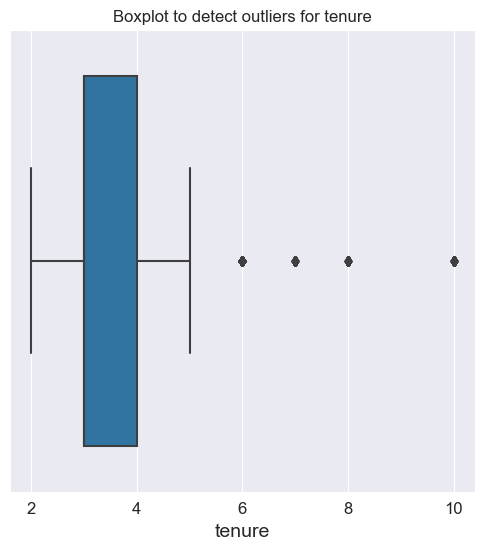

In [10]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

The boxplot above shows that there are outliers in the `tenure` variable. 

It would be helpful to investigate how many rows in the data contain outliers in the `tenure` column.

In [6]:
# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove these outliers based on the type of model you decide to use.

# pAce: Analyze Stage<a id='pace1'></a>
- Perform EDA (analyze relationships between variables) 


### To achieve the first goal, we will try to answer the questions listed below:

- Is theere any relationships between the variables variables?
- What are the distributions in the data? 
- How do tenure, average_monthly_hours, satisfaction_level and number_project cause an employee to leave?




## Step 2. Data Exploration (Continue EDA)<a id='st3'></a>

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [184]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


In [185]:
df1.groupby('left')[["satisfaction_level",'last_evaluation','number_project','average_monthly_hours', 'tenure']].mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure
left,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000
1,0.440271,0.721783,3.883476,208.16223,3.881467


1. It might be natural that those who leave a company have a lower satisfaction with the company. This appears to be the case here, with those who left the company having lower satisfaction level of `0.44` as compared to those who stayed with satisfaction leave of `0.667`


2. It seems that employee who left the company work for more hours than those who stayed

### Data visualizations<a id='dv'></a>

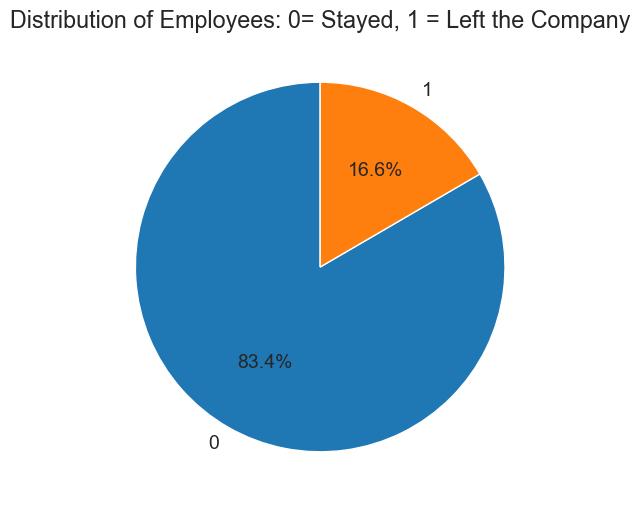

In [18]:
# Count the occurrences of each group
group_counts = df1['left'].value_counts()

plt.figure(figsize=(8, 6))
group_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Distribution of Employees: 0= Stayed, 1 = Left the Company')
plt.savefig("distribution.png")

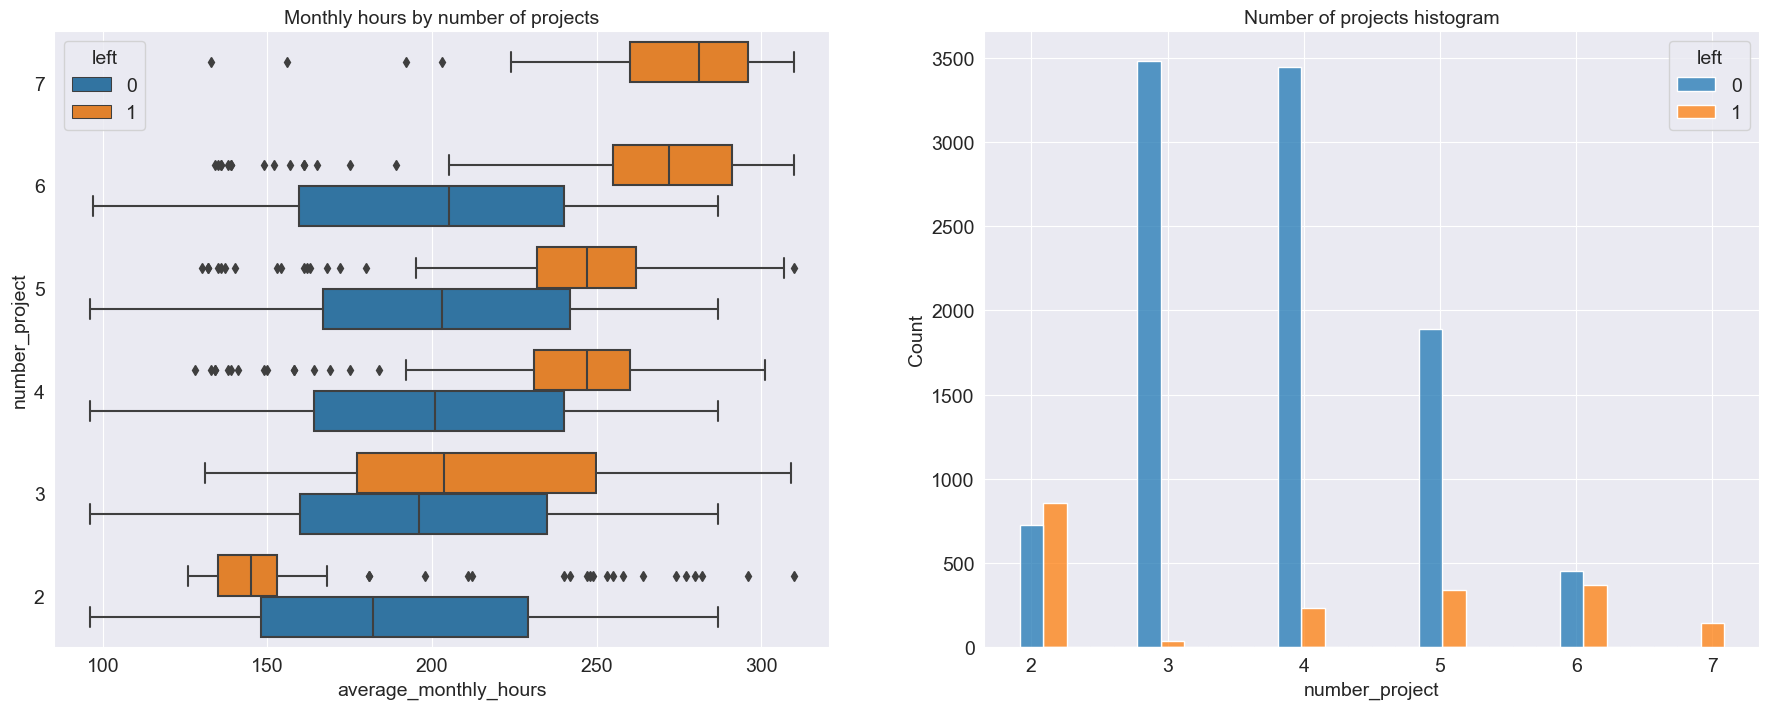

In [187]:
# Create a plot as needed 

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. They have worked on 2 to 3 project. 
For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/week&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

As the next step, you could confirm that all employees with seven projects left.

if you assume working day Monday–Friday, then total working hours in a month `5*4* 24 hours per day = 480 hours per month`. Define new column, monthly_loyalty = `average_monthly_hours/480`

In [189]:
# Get value counts of stayed/left for employees
df1.groupby(["number_project",'left']).size().reset_index(name='employee_count')

,number_project,left,employee_count
0,2,0,725
1,2,1,857
2,3,0,3482
3,3,1,38
4,4,0,3448
5,4,1,237
6,5,0,1890
7,5,1,343
8,6,0,455
9,6,1,371


This confirms that all employees with 7 projects did leave. 

Next, you could examine the average monthly hours versus the satisfaction levels. 

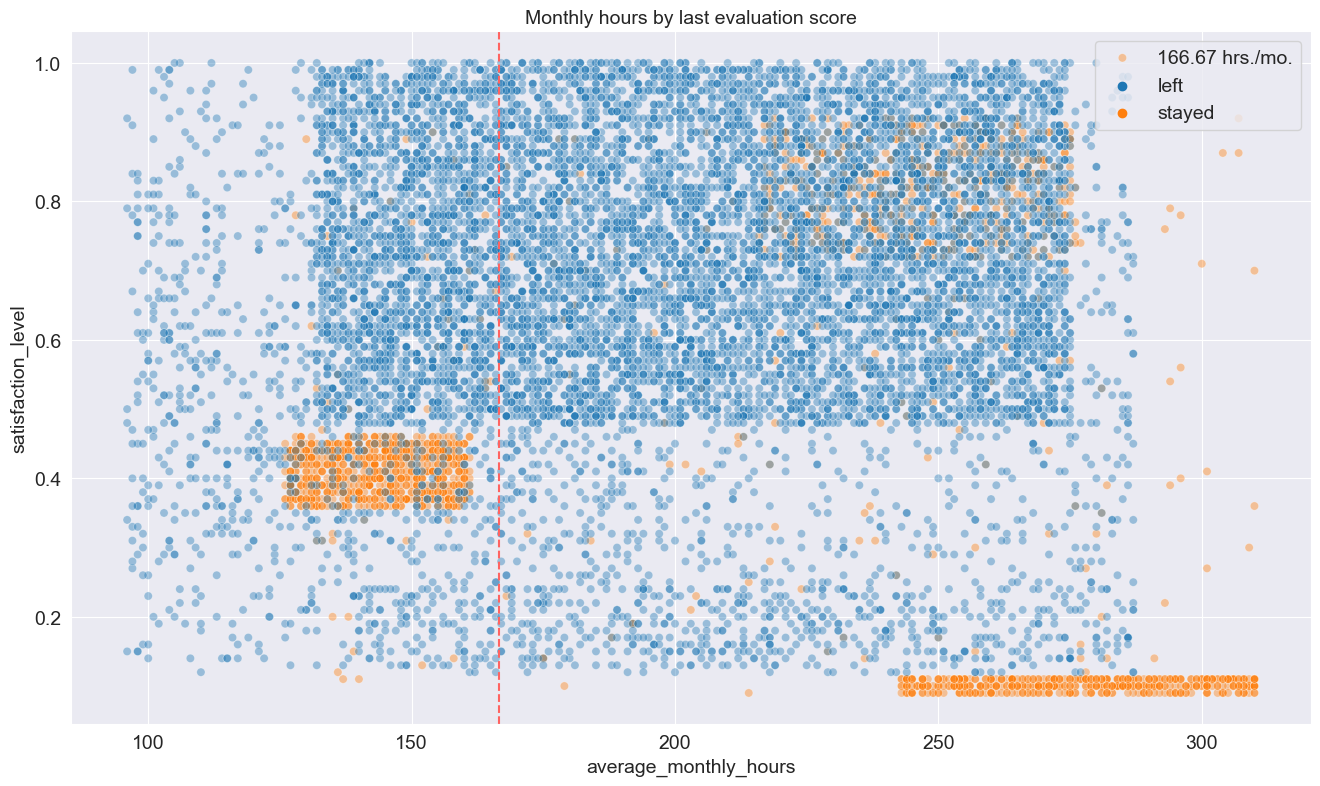

In [190]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))

sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 



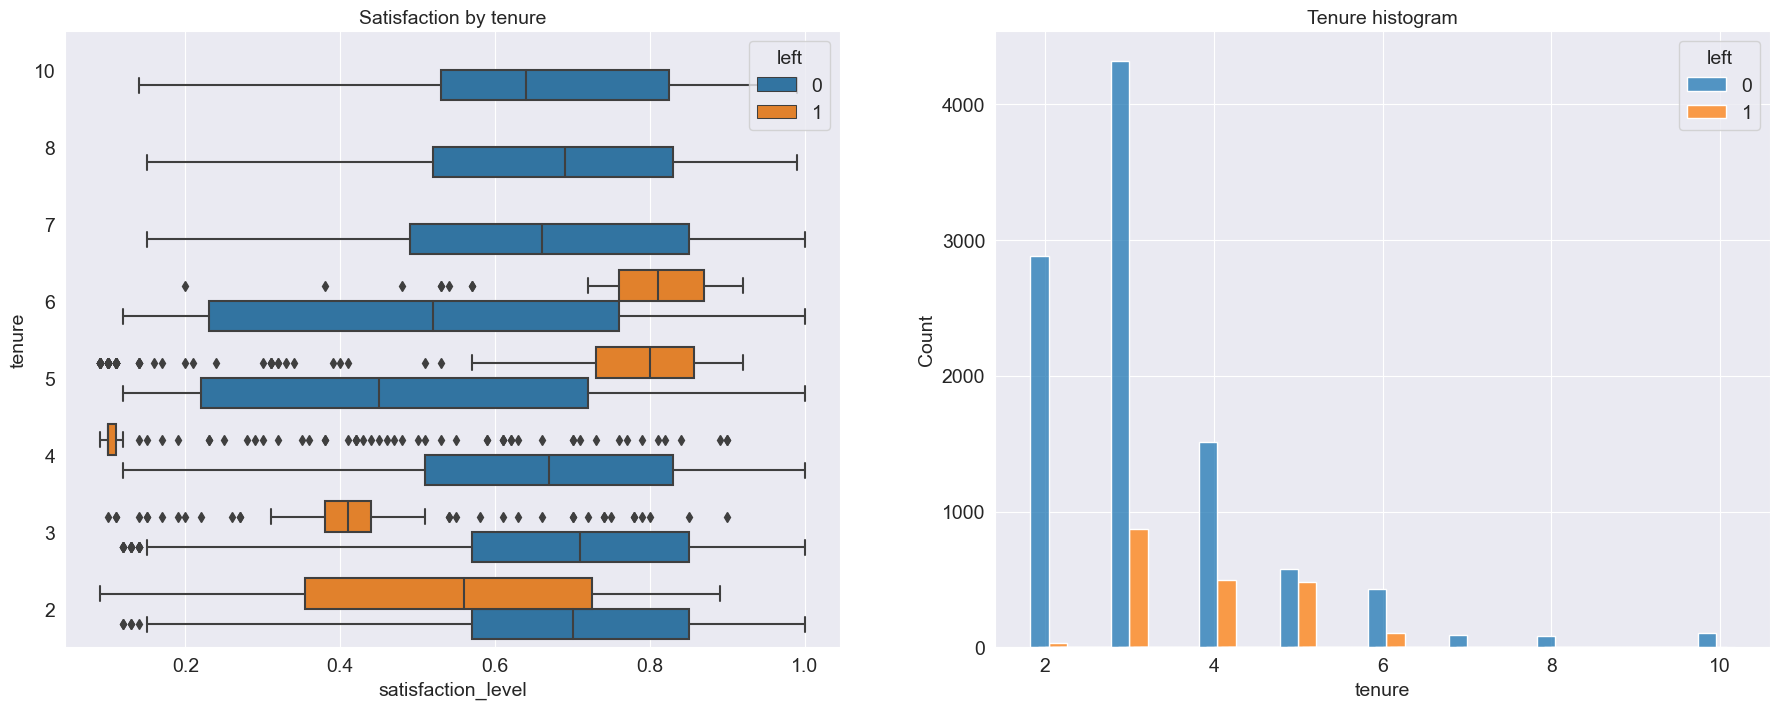

In [111]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

There are many observations you could make from this plot.
- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.



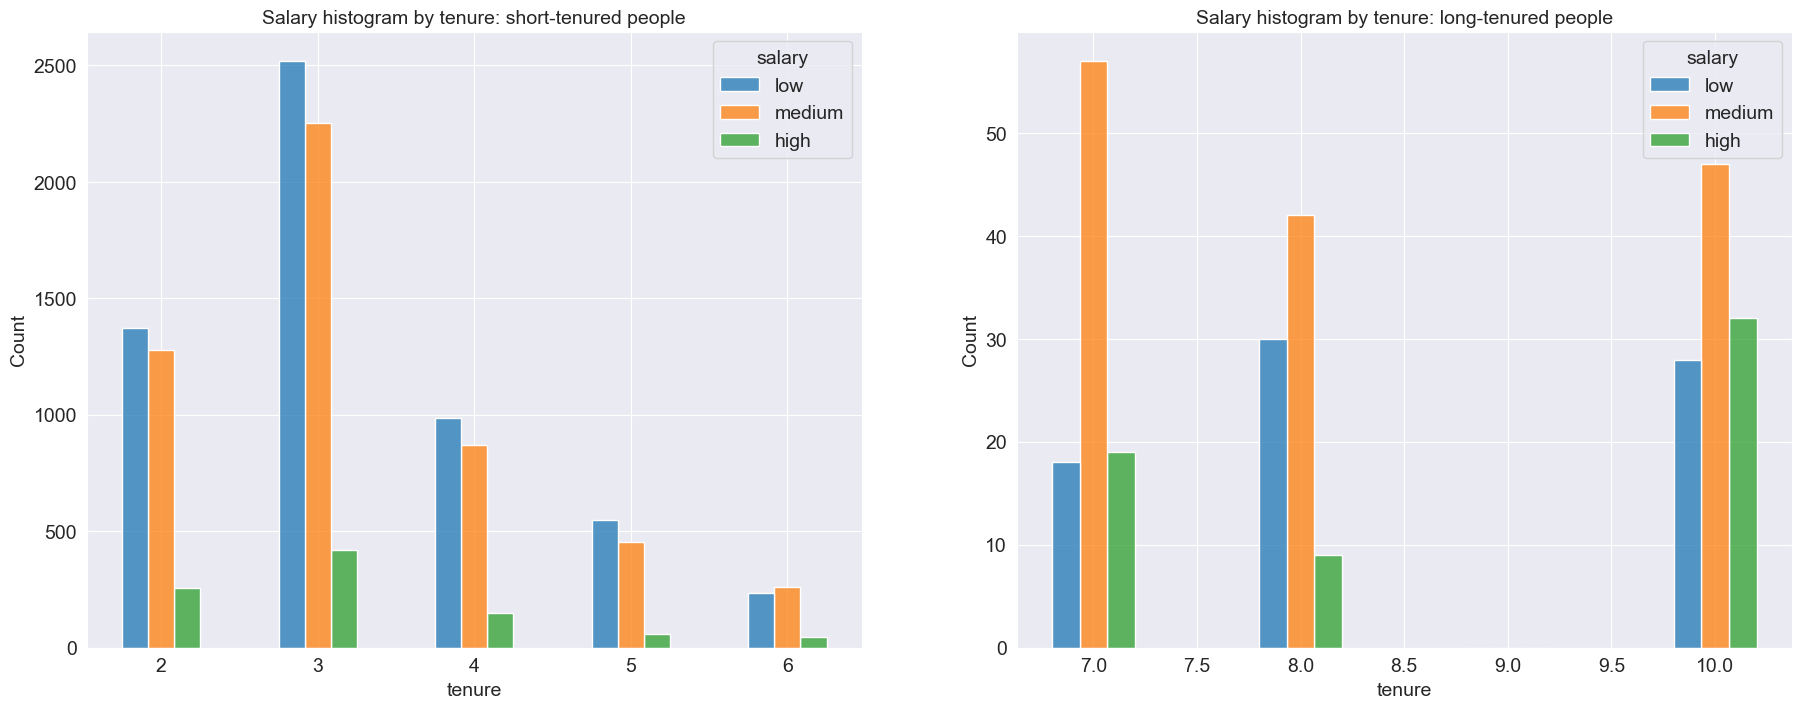

In [191]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 

Next, you could explore whether there's a correlation between working long hours and receiving high evaluation scores. You could create a scatterplot of `average_monthly_hours` versus `last_evaluation`.

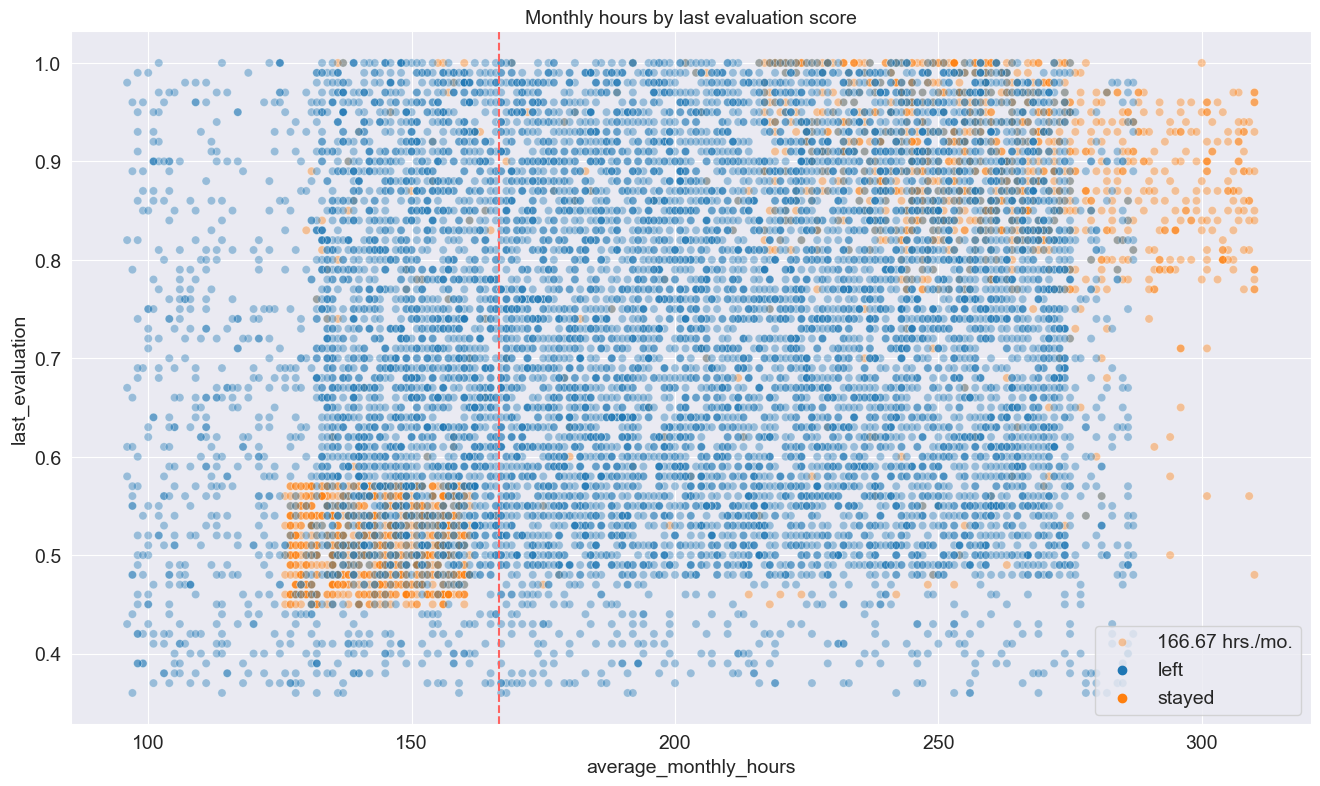

In [123]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.


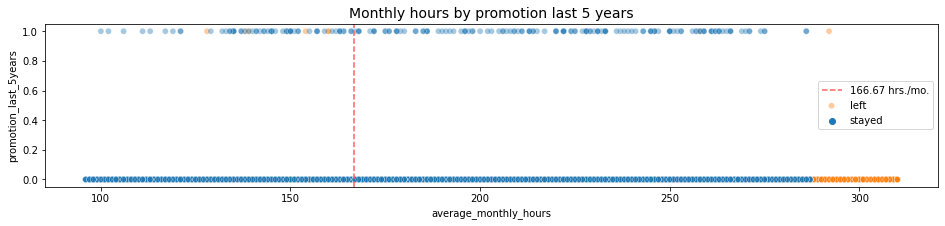

In [21]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  



In [124]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

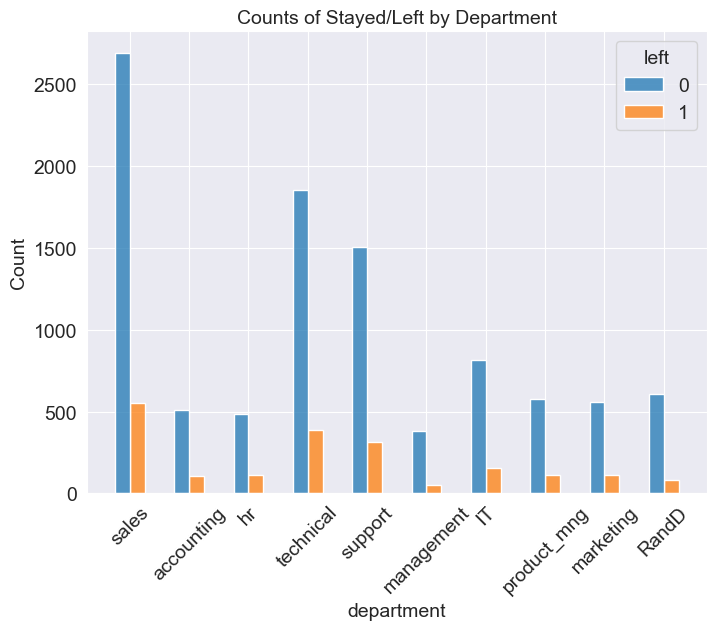

In [194]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(8,6))
sns.histplot(data=df1, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.xticks(rotation= 45)
plt.title('Counts of Stayed/Left by Department', fontsize=14);


There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 

Lastly, you could check for strong correlations between variables in the data.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2896\1988851805.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))


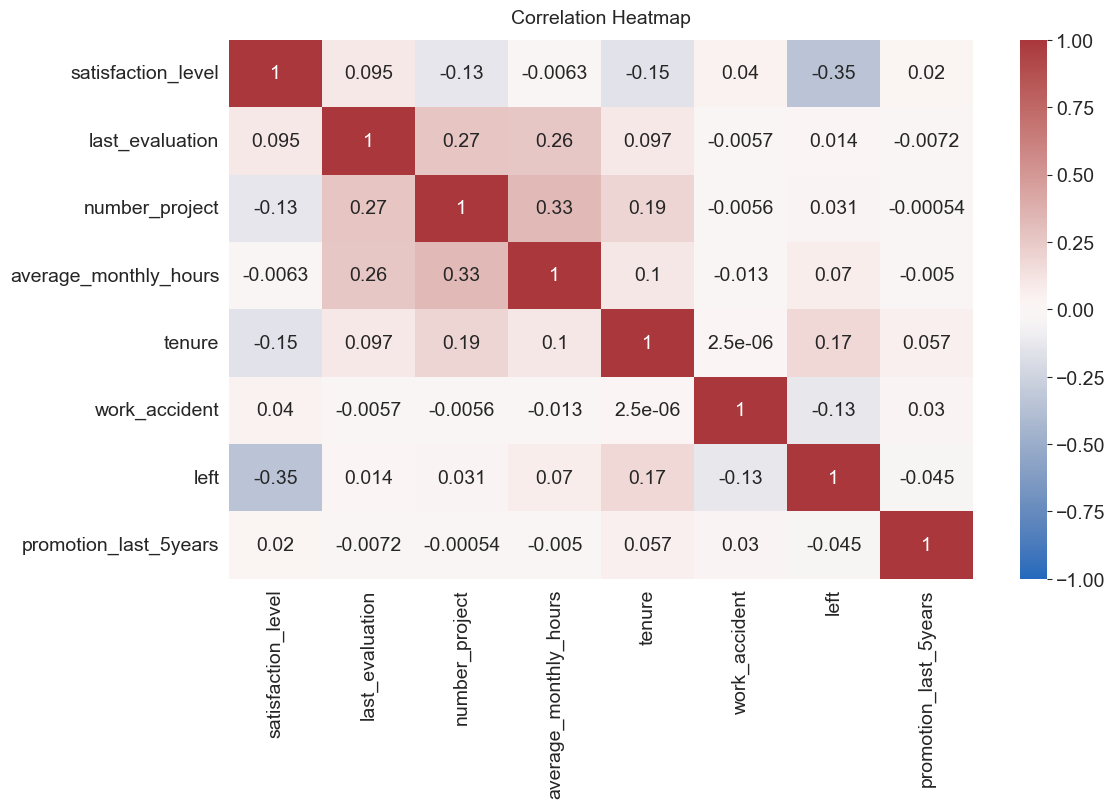

In [197]:
# Plot a correlation heatmap
plt.figure(figsize=(12, 7))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### A/B Testing <a id='abt'></a>

   ####  Hypothesis 1: 

$H_0$: There is no significant difference in monthly working hours between the two groups.

$H_A$: Employees who left the company worked more.

#### Set the significance level:

In [19]:
# choose significance level of 5%
significance_level = 0.05

In [20]:
# Separate the data into two groups
stayed = df1[df1['left'] == 0]['average_monthly_hours']
left = df1[df1['left'] == 1]['average_monthly_hours']

# Perform a one-tailed t-test with the alternative hypothesis that left group worked more
t_stat, p_value = stats.ttest_ind(left, stayed, alternative='greater')

# Print the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Compare the p-value to the significance level
if p_value < significance_level:
    print("Reject the null hypothesis: Employees who left the company worked more.")
else:
    print("Fail to reject the null hypothesis: No evidence that employees who left worked more.")      
      

t-statistic: 7.7286004860688795
p-value: 5.869695356432809e-15
Reject the null hypothesis: Employees who left the company worked more.


With a p-value (5.87e-15) being less than 0.05 (as your significance level is 5%) and a t-statistic < 0 (7.72
), **we reject the null hypothesis** in favour of the **alternative hypothesis**

Therefore, you can conclude at the 5% significance level that employees who leave the company work more than those who stay.

### Insights<a id='is'></a>

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

# paCe: Construct <a id='con'></a>
- Determine which models are most appropriate
- Construct the model 
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation <a id='st4'></a>


### Modeling Approach :  Tree base Model



### Feature Engineering<a id='fe'></a>

In [6]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df1.loc[:, 'overworked'] = df1['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df1['overworked'].max())
print('Min hours:', df1['overworked'].min())

Max hours: 310
Min hours: 96


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6156\511354219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'overworked'] = df1['average_monthly_hours']


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

You could define being overworked as working more than 175 hours per month on average.

To make the `overworked` column binary, you could reassign the column using a boolean mask.
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

if you assume working day Monday–Friday, then total working hours in a month is `5*4* 24 hours per day = 480 hours per month. `Define new column, `monthly_loyalty = average_monthly_hours/480`

In [7]:
# Modify 'overworked' column using .loc
df1.loc[:, 'overworked'] = (df1['overworked'] > 175).astype(int)

# Modify 'monthly_loyalty' column using .loc
df1.loc[:, "monthly_loyalty"] = round(df1["average_monthly_hours"] / 480, 2)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6156\975859218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'overworked'] = (df1['overworked'] > 175).astype(int)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6156\975859218.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df1.loc[:, 'overworked'] = (df1['overworked'] > 175).astype(int)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6156\975859218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [8]:
df1 = df1.drop(["average_monthly_hours","department","satisfaction_level"], axis = 1)
df1.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,overworked,monthly_loyalty
0,0.53,2,3,0,1,0,low,0,0.33
1,0.86,5,6,0,1,0,medium,1,0.55
2,0.88,7,4,0,1,0,medium,1,0.57
3,0.87,5,5,0,1,0,low,1,0.46
4,0.52,2,3,0,1,0,low,0,0.33


In [9]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)


# Display the new dataframe
df_enc.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,overworked,monthly_loyalty
0,0.53,2,3,0,1,0,0,0,0.33
1,0.86,5,6,0,1,0,1,1,0.55
2,0.88,7,4,0,1,0,1,1,0.57
3,0.87,5,5,0,1,0,0,1,0.46
4,0.52,2,3,0,1,0,0,0,0.33


In [10]:
y = df_enc['left']
X = df_enc.drop('left', axis=1)
# Display first few rows of the outcome variable
y.head() 

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [11]:
# Display the first few rows of the selected features 
X.head()

,last_evaluation,number_project,tenure,work_accident,promotion_last_5years,salary,overworked,monthly_loyalty
0,0.53,2,3,0,0,0,0,0.33
1,0.86,5,6,0,0,1,1,0.55
2,0.88,7,4,0,0,1,1,0.57
3,0.87,5,5,0,0,0,1,0.46
4,0.52,2,3,0,0,0,0,0.33


### Train test Split<a id='tts'></a>

In [12]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [12]:
df_enc['left'].value_counts(normalize=True)

0    0.833959
1    0.166041
Name: left, dtype: float64

### Decision tree <a id='dt'></a>

In [13]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, cv=5, n_jobs=-1)

In [14]:
%%time
tree1.fit(X_train, y_train)

CPU times: total: 453 ms
Wall time: 6.63 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]})

In [15]:
# Check best parameters
tree1.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [16]:
# Check best score on CV
tree1.best_score_

0.9690872632861787

This is a strong score, which shows that this model can predict employees who will leave very well.

Next, you will fit the model to the best parameters

In [16]:
tree_final = DecisionTreeClassifier(random_state=42, max_depth= 8,min_samples_leaf = 1, min_samples_split=4) 

In [17]:
%%time
tree_final.fit(X_train, y_train)

CPU times: total: 31.2 ms
Wall time: 20.6 ms


DecisionTreeClassifier(max_depth=8, min_samples_split=4, random_state=42)

In [18]:
train_pred = tree_final.predict(X_train)
test_pred = tree_final.predict(X_test)

In [19]:
# Create classification report 
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_train, train_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.99      0.98      0.98      7500
    Predicted would leave       0.91      0.93      0.92      1493

                 accuracy                           0.97      8993
                macro avg       0.95      0.95      0.95      8993
             weighted avg       0.97      0.97      0.97      8993



In [20]:
# Create classification report for test set
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, test_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.98      0.98      2500
    Predicted would leave       0.91      0.92      0.92       498

                 accuracy                           0.97      2998
                macro avg       0.95      0.95      0.95      2998
             weighted avg       0.97      0.97      0.97      2998



<Figure size 800x700 with 0 Axes>

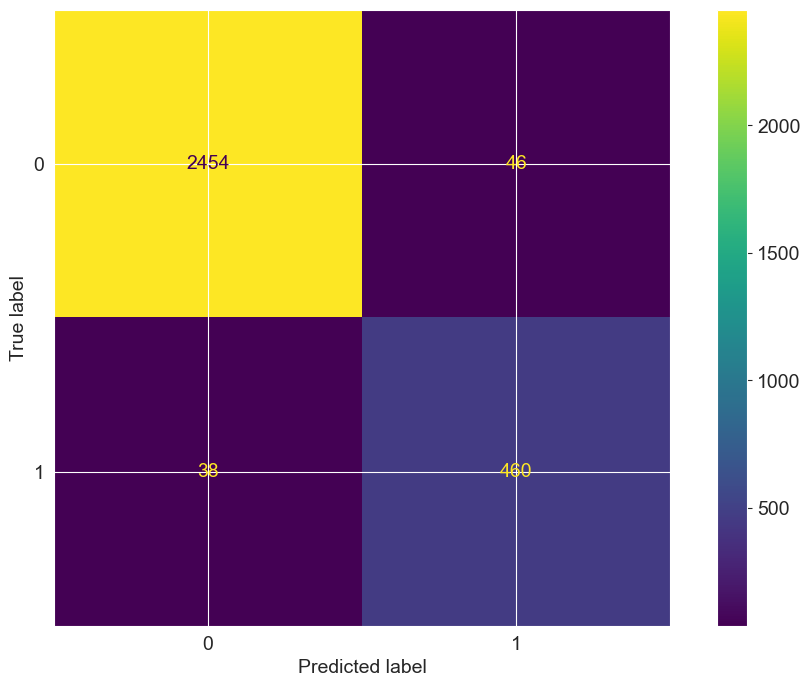

In [21]:
# Generate array of values for confusion matrix
plt.figure(figsize=(8, 7))
cm = confusion_matrix(y_test,test_pred, labels=tree_final.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=tree_final.classes_)
disp.plot(values_format='');

The upper-left quadrant displays the number of true negatives.
The upper-right quadrant displays the number of false positives.
The bottom-left quadrant displays the number of false negatives.
The bottom-right quadrant displays the number of true positives.

True negatives (TN): The number of people who did not leave that the model accurately predicted did not leave.

False positives (FP): The number of people who did not leave that the model inaccurately predicted as leaving.

False negatives (FN): The number of people who left that the model inaccurately predicted did not leave

True positives (TP): The number of people who left that the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

### Random forest<a id='rf'></a>

Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [22]:
# Instantiate model
rf = RandomForestClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  


# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, cv=5 , n_jobs=-1)

Fit the random forest model to the training data.

In [23]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: total: 7.17 s
Wall time: 12min 49s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]})

In [24]:
rf1.best_score_ 

0.9743133158268004

Identify the optimal values for the parameters of the random forest model.

In [25]:
# Check best params
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

let fit the model to the best parameters

In [26]:
rf_final = RandomForestClassifier(random_state=42, max_depth = None, max_features = 1.0, max_samples = 0.7, min_samples_leaf = 1,
                           min_samples_split =4, n_estimators = 300)

In [27]:
%%time
rf_final.fit(X_train, y_train)

CPU times: total: 4.3 s
Wall time: 4.3 s


RandomForestClassifier(max_features=1.0, max_samples=0.7, min_samples_split=4,
                       n_estimators=300, random_state=42)

In [28]:
train_pred = rf_final.predict(X_train)
test_pred = rf_final.predict(X_test)

In [29]:
# Create classification report for test set
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, test_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.98      0.99      0.99      2500
    Predicted would leave       0.95      0.91      0.93       498

                 accuracy                           0.98      2998
                macro avg       0.97      0.95      0.96      2998
             weighted avg       0.98      0.98      0.98      2998



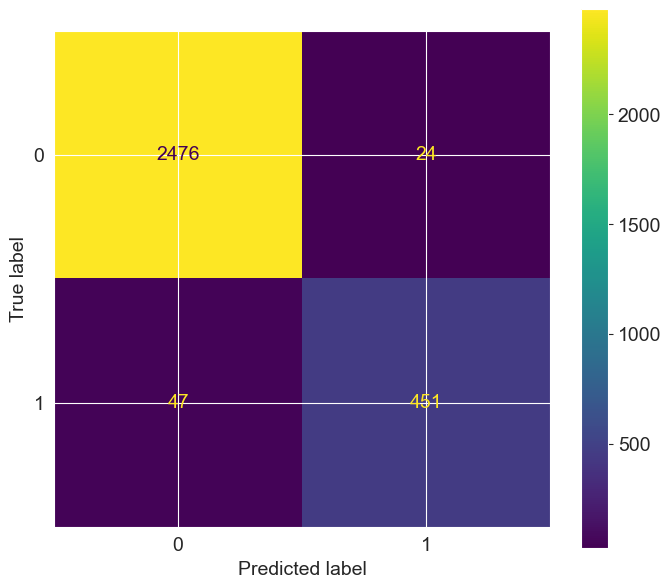

In [30]:
plt.figure(figsize=(8, 7))
cm = confusion_matrix(y_test, test_pred, labels=rf_final.classes_)

# Plot confusion matrix without gridlines
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_final.classes_)
ax = disp.plot(values_format='', ax=plt.gca())  # Specify the axes



The confusion matrix indicates that the random forest model mostly outperforms the decision tree model.


The Random Forest model having more FN than FP,implies that the model may be at risk of not identifying true cases of employees leaving, which could be a missed opportunity to take preventive actions.

Although the Random Forest model mostly outperforms the decision tree model, however, the decision tree model having more FP than FN, coudld be able to true cases of employees leave, which which the HR take retentive measures. So therefore, we will adopt decision tree model as suitable solution for employees retention

For exploratory purpose, you might want to inspect the splits of the decision tree model and the most important features in the random forest model. 

### Model Visualization<a id='md'></a>

#### Decision tree splits

In [32]:
input_features = ['last_evaluation', 'number_project', 'tenure', 'work_accident',
       'promotion_last_5years', 'salary', 'overworked', 'monthly_loyalty']

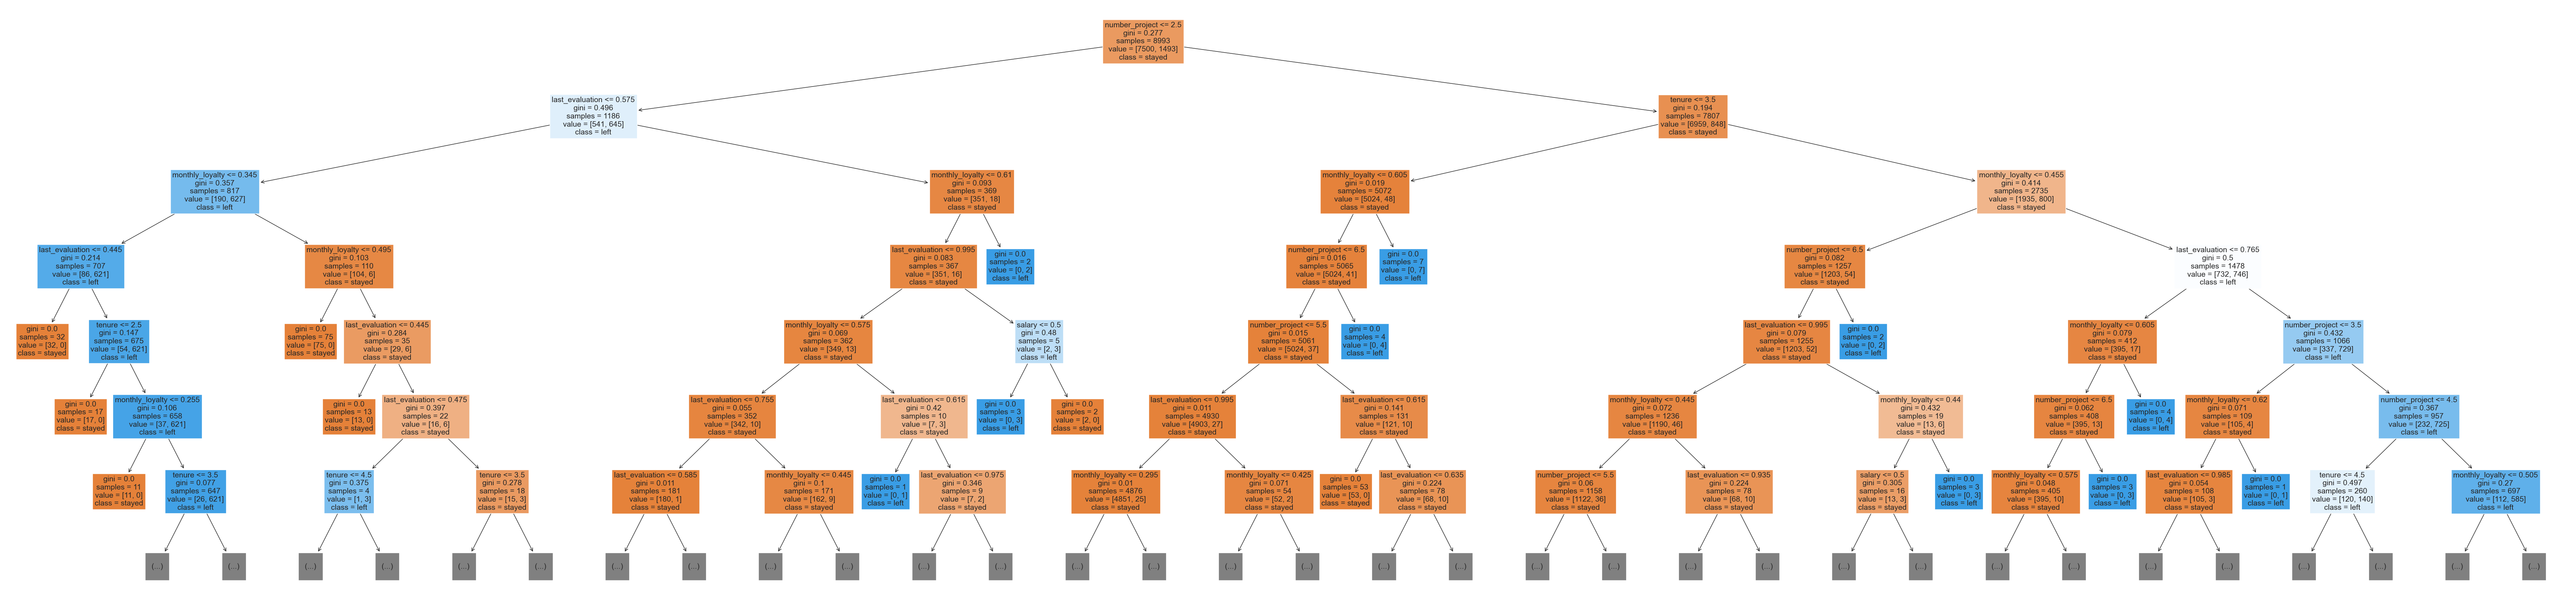

In [33]:
# Plot the tree
class_names = ['stayed', 'left']

plt.figure(figsize=(85,20))
plot_tree(tree_final, max_depth=6, fontsize=14, feature_names=input_features, 
          class_names=class_names, filled=True);
plt.show()

Note that you can double-click on the tree image to zoom in on it and inspect the splits.

#### Decision tree feature importance

You can also get feature importance from decision trees (see the [DecisionTreeClassifier scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) for details).

In [34]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree_final.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.291970
number_project,0.264615
monthly_loyalty,0.238187
tenure,0.201225
salary,0.002500
overworked,0.000971
work_accident,0.000458
promotion_last_5years,0.000075


You can then create a barplot to visualize the decision tree feature importances.

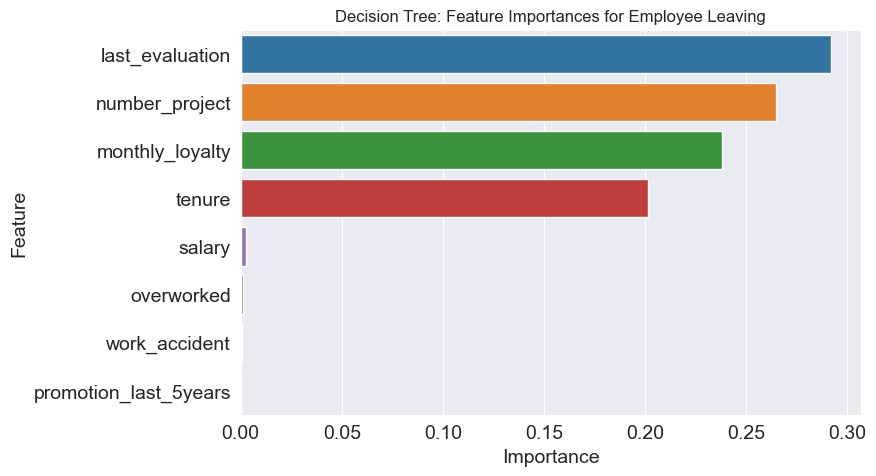

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.savefig("decisiontree.png")
plt.show()


The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `monthly_loyalty`, and `tenure` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

#### Random forest feature importance



In [38]:
RF_importances = pd.DataFrame(rf_final.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
RF_importances = RF_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
RF_importances = RF_importances[RF_importances['gini_importance'] != 0]
RF_importances

,gini_importance
last_evaluation,0.277909
number_project,0.267974
monthly_loyalty,0.259349
tenure,0.173522
salary,0.013729
work_accident,0.005725
promotion_last_5years,0.001017
overworked,0.000774


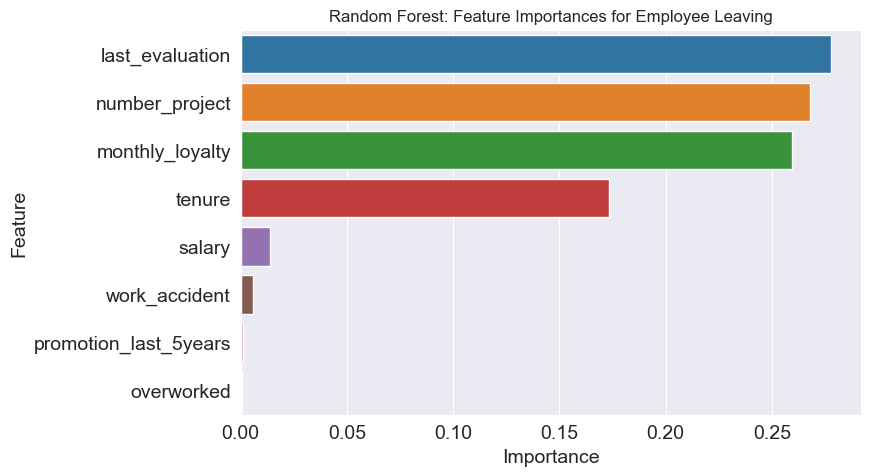

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(data=RF_importances, x="gini_importance", y=RF_importances.index, orient='h')
plt.title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.savefig("rf.png")
plt.show()

The plot above shows that in this random forest model,  `last_evaluation`, `number_project`, `monthly_loyalty`, `tenure`and `salary` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

In [41]:
model_filename = 'employee retention model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(tree_final, model_file)


# pacE: Execute Stage<a id='es'></a>
- Interpret model performance and results
- Share actionable steps with stakeholders



### Conclusion and Recommendations<a id='cr'></a>

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 


# Reference <a id ='r'></a>

* [Google Advanced Data Analytics Capstone](https://www.coursera.org/learn/google-advanced-data-analytics-capstone/home/module/1) 
